# 📊 Exploratory Data Analysis (EDA)
## Dataset: [Airlines Flights Data]
Source: [Kaggle Link](https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data) 

### Tools
- pandas
- matplotlib
- seaborn

### 🎯 Goals
- Understand structure & quality of the dataset
- Perform univariate, bivariate, multivariate analysis
- Identify patterns, trends, and anomalies
- Generate insights & storytelling visuals
- Prepare data for further analysis or ML


## 📘 Table of Contents
1. Import Libraries & Setup
2. Load Data
3. Data Overview
4. Data Quality Checks
5. Univariate Analysis
6. Bivariate & Multivariate Analysis
7. Feature Engineering
8. Insights & Patterns
9. Conclusion

## 1. 📚 Import Libraries & Setup

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)   
sns.set_theme(style="whitegrid")


## 2. 📂 Load Data

In [443]:
'''
Here data already has index column so setting  to 0 while reading csv file.
'''
df = pd.read_csv('data\\airlines_flights_data.csv', index_col=0)  ##Read airline_flights_data

df_shape = df.shape  ##Get the shape of dataframe
print(f"Database has {df_shape[0]} rows and {df_shape[1]} columns")

df.head()  ##print first 5 rows of dataframe

Database has 300153 rows and 11 columns


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## 3. 🔎 Data Overview

In [444]:
'''Get a concise summary of the dataframe. 
    Prints the number of non-null entries and data types of each column. 
    Also prints the memory usage of the dataframe.'''
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 155.1 MB


The dataset contains 300,153 rows and 11 columns, with no missing values in any feature. Columns include a mix of data types: 2 integer columns (`days_left`, `price`), 1 float column (`duration`), and 8 object (string) columns (such as `airline`, `flight`, `source_city`, etc.). This ensures comprehensive coverage of flight details, timing, and pricing, making the data suitable for analysis and modeling.

In [445]:
cat_cols = df.select_dtypes(exclude=np.number).columns
df[cat_cols] = df[cat_cols].astype('category')  ##Convert categorical columns to 'category' dtype

df.dtypes  ##Get the data types of each column

airline             category
flight              category
source_city         category
departure_time      category
stops               category
arrival_time        category
destination_city    category
class               category
duration             float64
days_left              int64
price                  int64
dtype: object


- **Categorical columns:**
    - `airline` and `flight`: Many unique entries, reflecting a variety of carriers and flight options.
    - `class`: Two unique values (`Economy`, `Business`), with Economy being the most common.
    - `stops`, `departure_time`, `arrival_time`, `source_city`, and `destination_city`: Multiple categories, capturing different travel patterns and routes.
- The dataset is complete and diverse, making it suitable for statistical analysis and machine learning applications.


## 4. 🧹 Data Quality Checks

In [446]:
print('Missing values:\n', df.isnull().sum())  ##Check for missing values in each column
print('\nDuplicates:', df.duplicated().sum())  ##Check for duplicate rows in the dataframe

Missing values:
 airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Duplicates: 0


#### ✅ Data Quality Summary

- **No missing values:** All columns are complete.
- **No duplicate rows:** Each record is unique.
- **Ready for EDA:** The dataset is clean and well-structured.

## 5. 📈 Univariate Analysis

In [447]:
# Numerical columns
num_cols = df.select_dtypes(include=np.number).columns
df_num_desc = df[num_cols].describe().T  ##Statistical summary of numerical columns

## Adding additional statistics of trimmed mean (10%)
df_num_desc['iqr'] = df_num_desc['75%'] - df_num_desc['25%']
df_num_desc['trimmed_mean_10%'] = df[num_cols].apply(lambda x: trim_mean(x, proportiontocut=0.1))

df_num_desc.rename_axis('Feature', axis='columns', inplace=True)
df_num_desc  ##Display the statistical summary of numerical columns with trimmed mean


Feature,count,mean,std,min,25%,50%,75%,max,iqr,trimmed_mean_10%
duration,300153.00,12.22,7.19,0.83,6.83,11.25,16.17,49.83,9.34,11.72
days_left,300153.00,26.00,13.56,1.00,15.00,26.00,38.00,49.00,23.00,26.09
price,300153.00,20889.66,22697.77,1105.00,4783.00,7425.00,42521.00,123071.00,37738.00,17547.69


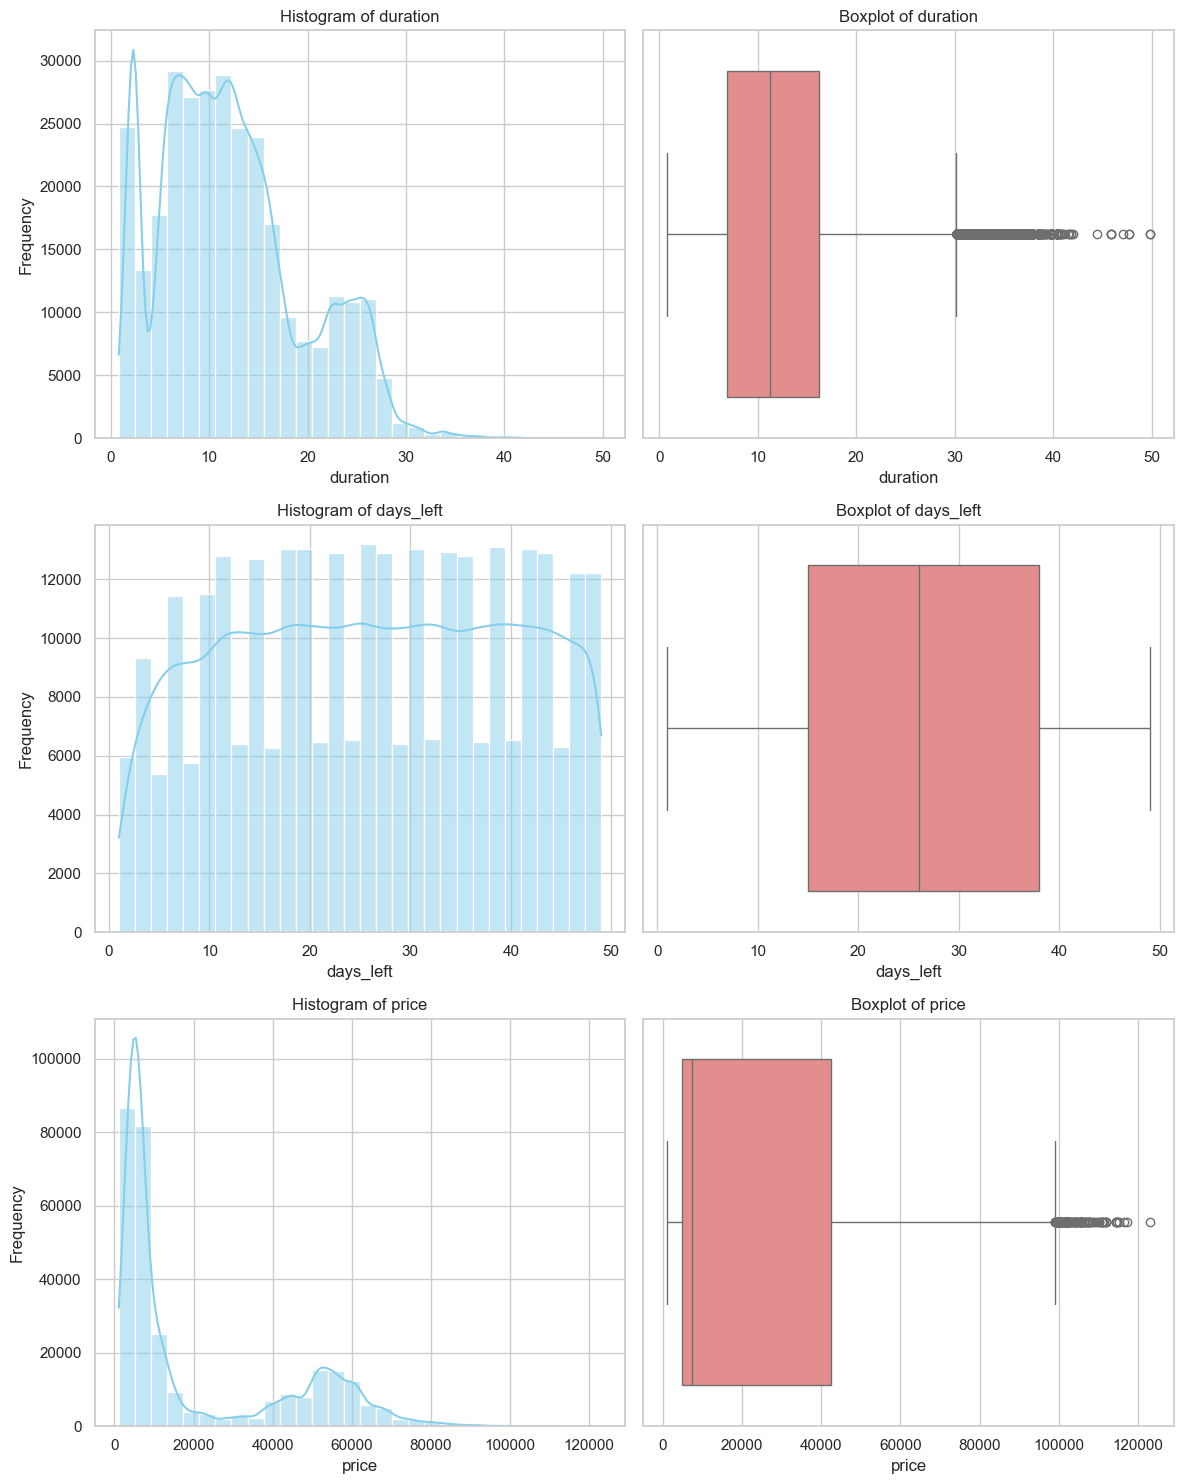

In [448]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(df[col], ax=axes[i, 0], kde=True, bins=30, color='skyblue')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

### 🔍 Univariate Analysis Summary (Numerical Columns)

**Numerical features:** `duration`, `days_left`, and `price`  

- **Flight Duration:**  
  - Ranges from **0.8–49 hrs** (avg ≈ 12 hrs).  
  - Most flights fall between **2–20 hrs**; distribution is **right-skewed** with few long-haul outliers.

- **Days Left to Departure:**  
  - Bookings range **1–49 days** ahead (mean ≈ 26).  
  - Fairly **uniform spread**, minimal outliers — balanced booking behavior.

- **Ticket Price:**  
  - Spans **₹1.1 K–₹1.23 L** (mean ≈ ₹20.9 K).  
  - **Strong right-skew** — majority < ₹20 K, a few premium fares > ₹80 K.

**Insights:**  
High variability and right-skewed distributions, especially for **price** and **duration**.  
Outliers represent long-haul or premium flights — useful indicators for later feature engineering and modeling.


In [449]:
# Categorical columns
cat_cols = df.select_dtypes(exclude=np.number).columns
df[cat_cols].describe().T  ##Statistical summary of categorical columns

for col in cat_cols:
    print(f"\n\nProportion table for column: {col}")
    print(df[col].value_counts(normalize=True)*100)




Proportion table for column: airline
airline
Vistara     42.60
Air_India   26.95
Indigo      14.37
GO_FIRST     7.72
AirAsia      5.36
SpiceJet     3.00
Name: proportion, dtype: float64


Proportion table for column: flight
flight
UK-706    1.08
UK-772    0.91
UK-720    0.88
UK-836    0.85
UK-822    0.82
          ... 
SG-1058   0.00
G8-405    0.00
6E-3211   0.00
6E-2939   0.00
6E-2914   0.00
Name: proportion, Length: 1561, dtype: float64


Proportion table for column: source_city
source_city
Delhi       20.44
Mumbai      20.29
Bangalore   17.34
Kolkata     15.44
Hyderabad   13.60
Chennai     12.89
Name: proportion, dtype: float64


Proportion table for column: departure_time
departure_time
Morning         23.70
Early_Morning   22.25
Evening         21.69
Night           16.00
Afternoon       15.92
Late_Night       0.44
Name: proportion, dtype: float64


Proportion table for column: stops
stops
one           83.58
zero          12.00
two_or_more    4.43
Name: proportion, dtype: float

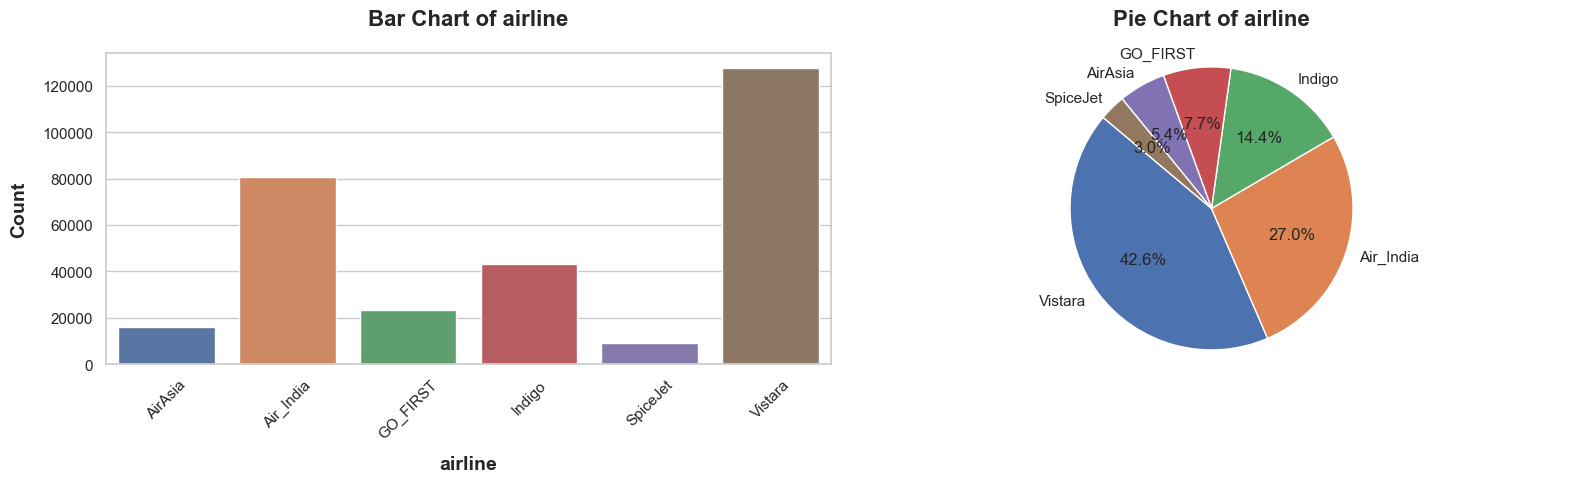

Skipping column flight with 1561 unique values for visualization.


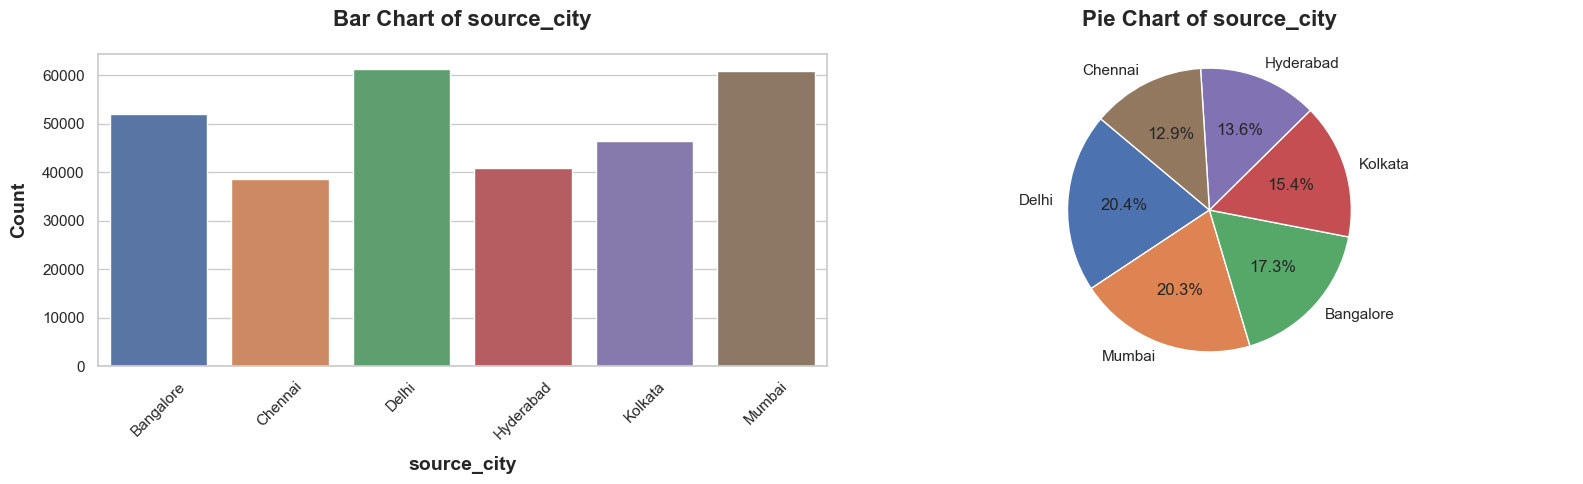

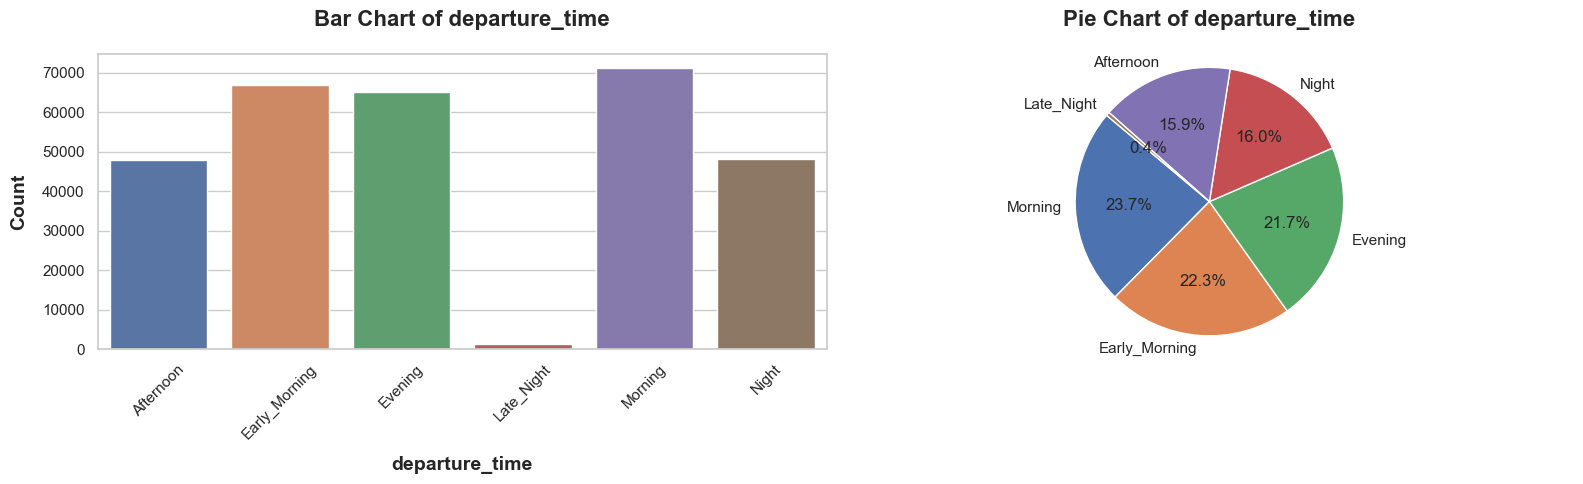

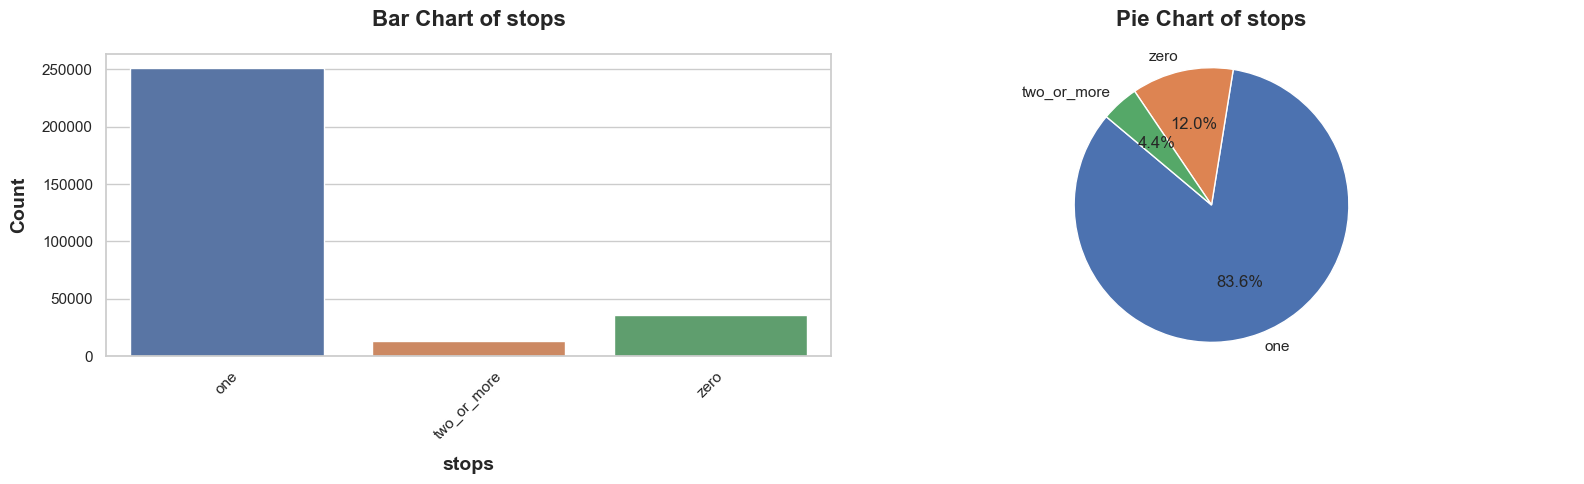

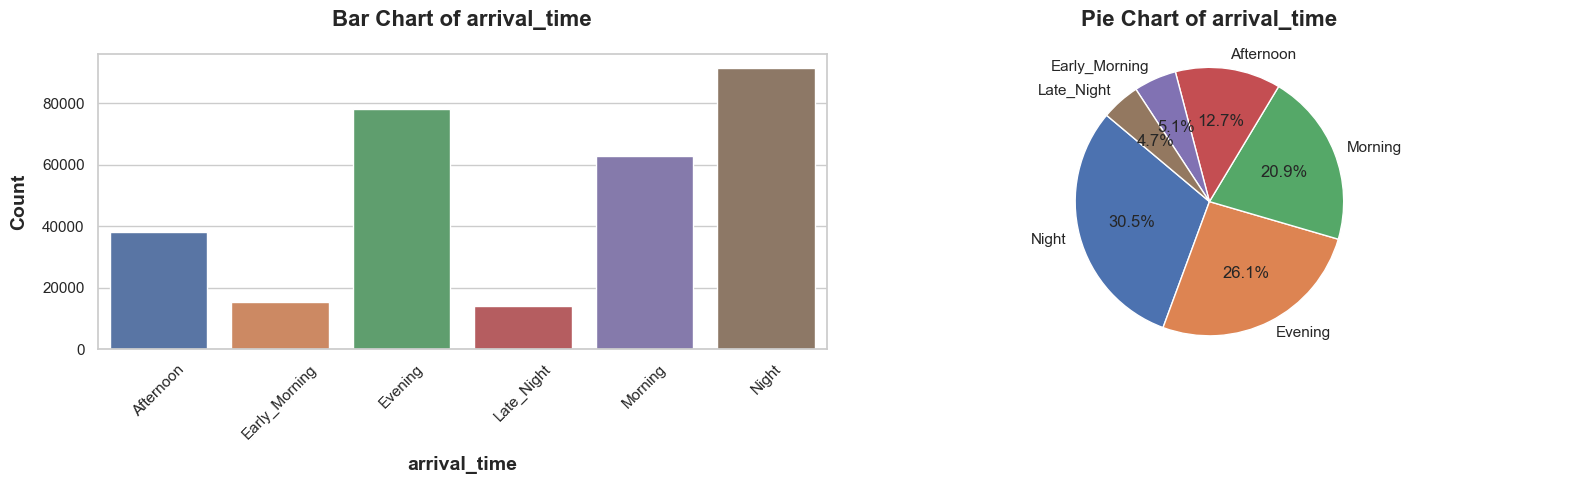

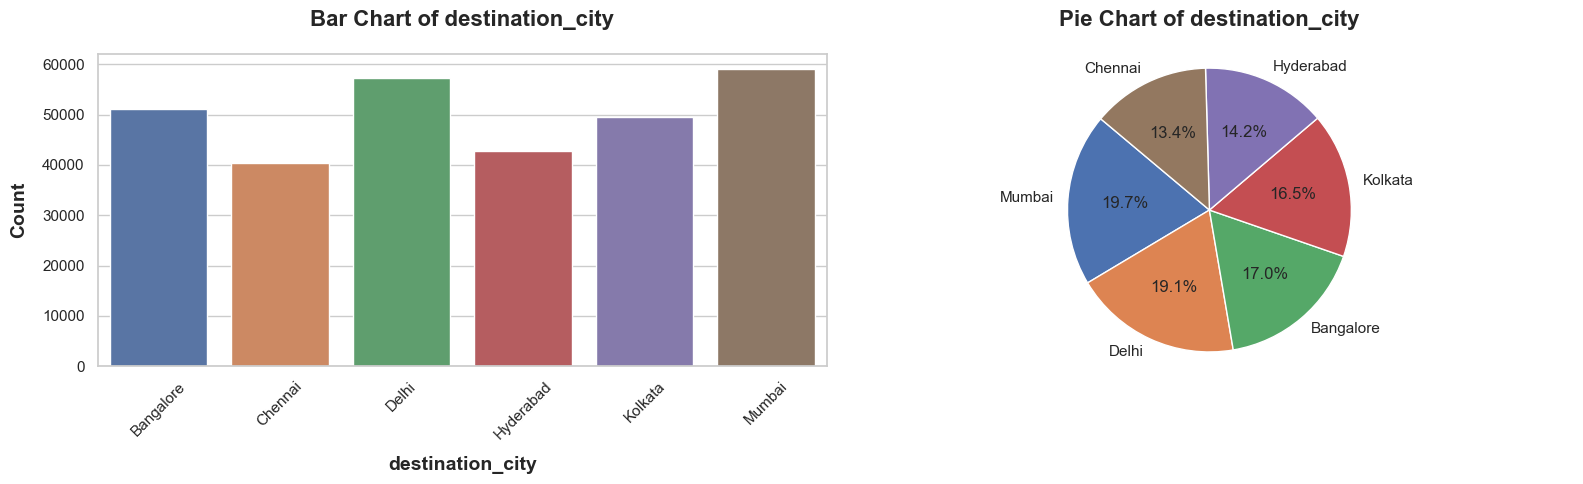

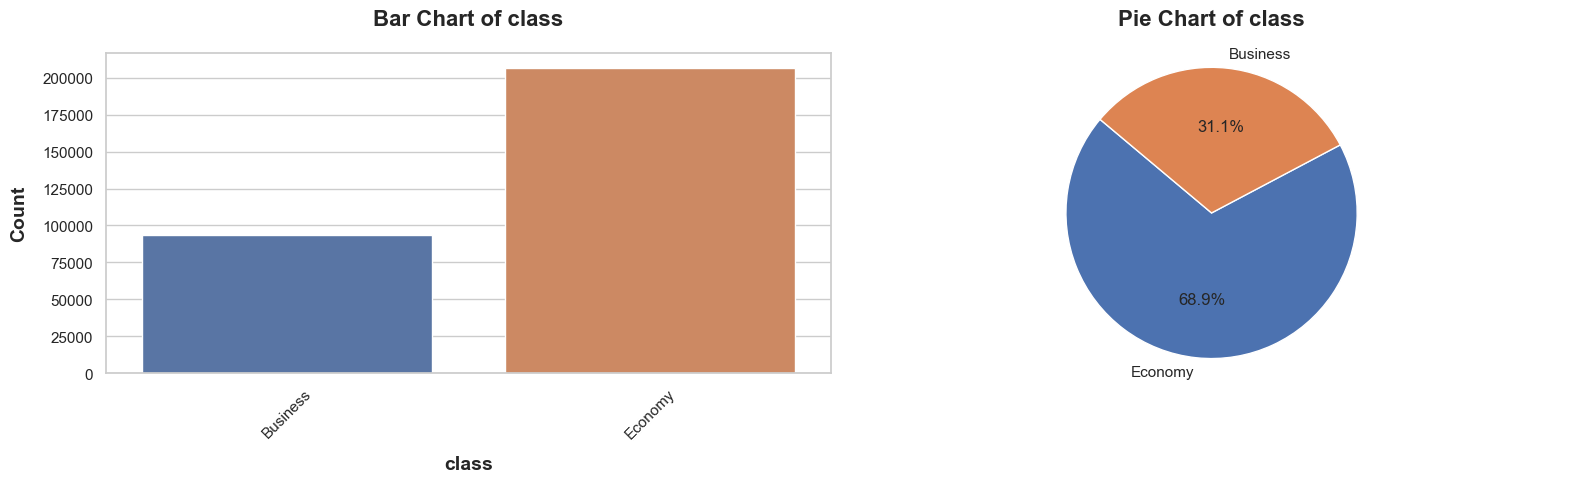

In [450]:
# Univariate analysis visualizations for categorical columns

for col in cat_cols:
    if df[col].nunique() > 20:
        print(f"Skipping column {col} with {df[col].nunique()} unique values for visualization.")
        continue
    plt.figure(figsize=(16, 5))
    
    # Bar chart
    plt.subplot(1, 2, 1)
    value_counts = df[col].value_counts()
    axb = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, dodge=False, errorbar=None)
    axb.set_title(
        f'Bar Chart of {col}',
        fontsize=16,
        fontweight='bold',
        pad=20
    )
    #plt.title(f'Bar Chart of {col}')
    axb.set_xlabel(col, fontsize=14, fontweight='bold', labelpad=10)
    axb.set_ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)
    plt.xticks(rotation=45)
    
    # Pie chart
    plt.subplot(1, 2, 2)
    axp = plt.pie(np.asarray(value_counts.values), labels=value_counts.index.astype(str), autopct='%1.1f%%', startangle=140) # type: ignore
    plt.title(f'Pie Chart of {col}', fontsize=16, fontweight='bold', pad=20)
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

### 🔍 Univariate Analysis Summary (Categorical Columns)

**Categorical features:** `airline`, `flight`, `source`, `destination`, `departure_time`, `arrival_time`, `stops`, `class`

- **Airline & Flight:**  
  - Six major airlines with diverse routes.  
  - **Vistara** and **Air India** dominate (~69% bookings).

- **Source & Destination:**  
  - All major Indian cities covered.  
  - Fairly balanced route distribution — no single city dominates.

- **Departure & Arrival Times:**  
  - Flights spread across all slots; **Late_Night** least frequent.

- **Stops:**  
  - **1-stop** flights form ~80%; **non-stop** ~12%; few with 2+ stops (long-haul outliers).

- **Class:**  
  - **Economy:** 69%, **Business:** 31%.  
  - Balanced representation across both classes.

**Insights:**  
Categorical data is diverse and evenly distributed, enabling segmentation by airline, route, and class.  
Visuals confirm well-populated categories suitable for deeper pattern analysis.

## 6. 🔗 Bivariate & Multivariate Analysis

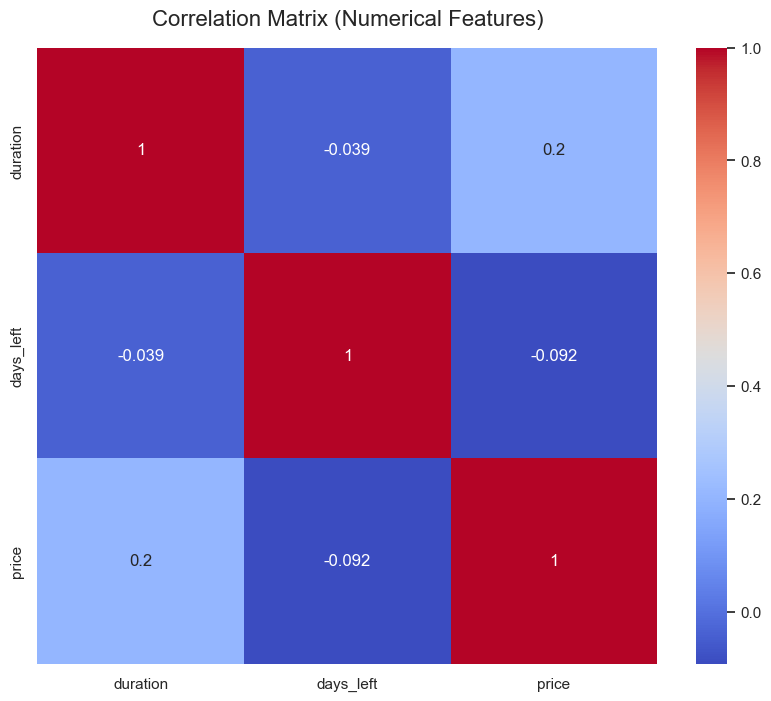

In [451]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)', fontsize=16, pad=16)
plt.show()

## 7. 🛠 Feature Engineering

In [452]:
# Create a new feature: price per hour of flight
'''Price per hour gives a normalized fare for flight efficiency comparison across routes/classes.  '''
df['price_per_hour'] = df['price'] / df['duration']

# Feature: is_business_class
''' Binary flag for business class aids segmenting premium travelers.'''
df['is_business'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

# Create booking type column as before
''' Booking type categorizes travel urgency, aiding in demand analysis. '''
df['booking_type'] = np.where(df['days_left'] > 30, 'Well-planned', 
                     np.where(df['days_left'] <= 2, 'Unplanned', 'Planned'))


display(df.dtypes)  ##Check data types of each column after feature engineering
df.head()  ##Display first 5 rows of dataframe with new features

airline             category
flight              category
source_city         category
departure_time      category
stops               category
arrival_time        category
destination_city    category
class               category
duration             float64
days_left              int64
price                  int64
price_per_hour       float64
is_business         category
booking_type          object
dtype: object

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,price_per_hour,is_business,booking_type
index,,,,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2743.32,0,Unplanned
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2554.94,0,Unplanned
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2744.70,0,Unplanned
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2646.67,0,Unplanned
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2555.79,0,Unplanned


## 8. 💡 Insights & Patterns

#### Q: Which are the top5 most frequent flights and flight paths?

In [453]:
# Top 5 most frequent flights along with their counts
top5_flights = df['flight'].value_counts().head(5)
print("Top 5 most frequent flights:")
display(top5_flights)

# Top 5 most frequent flight paths (source-destination pairs)
top5_paths = df.groupby(['source_city', 'destination_city'], observed=True).size().sort_values(ascending=False).head(5)
print("\nTop 5 most frequent flight paths (source → destination):")
display(top5_paths)

Top 5 most frequent flights:


flight
UK-706    3235
UK-772    2741
UK-720    2650
UK-836    2542
UK-822    2468
Name: count, dtype: int64


Top 5 most frequent flight paths (source → destination):


source_city  destination_city
Delhi        Mumbai              15289
Mumbai       Delhi               14809
Delhi        Bangalore           14012
Bangalore    Delhi               13756
             Mumbai              12939
dtype: int64

#### Q: Whats the % of economy and business seats offered by each airlines?

In [454]:
df_class_airline = pd.crosstab(df['airline'], df['class'], normalize='index') * 100
df_class_airline = df_class_airline.reset_index()
df_class_airline

class,airline,Business,Economy
0,AirAsia,0.00,100.00
1,Air_India,40.67,59.33
2,GO_FIRST,0.00,100.00
3,Indigo,0.00,100.00
4,SpiceJet,0.00,100.00
5,Vistara,47.39,52.61


**Answer:**  
Vistara and Air India are the only airlines offering both Economy and Business class seats—Vistara (52.6% Economy, 47.4% Business) and Air India (59.3% Economy, 40.7% Business). Indigo, GO FIRST, AirAsia, and SpiceJet offer only Economy class (100%).

#### Q: What is avarage price offering from each airline?

In [455]:
df.groupby(['airline','class'], observed=True)['price'].mean().reset_index().sort_values(by='price', ascending=True)    ##Average price by each airline, highest to lowest

,airline,class,price
0,AirAsia,Economy,4091.07
4,Indigo,Economy,5324.22
3,GO_FIRST,Economy,5652.01
5,SpiceJet,Economy,6179.28
2,Air_India,Economy,7313.68
7,Vistara,Economy,7806.94
1,Air_India,Business,47131.04
6,Vistara,Business,55477.03


**Observation:**  
AirAsia consistently offers the lowest economy fares, while business class prices are comparable between Air India and Vistara, with Vistara slightly higher.

#### Q: Does ticket price change based on the departure time and arrival time?

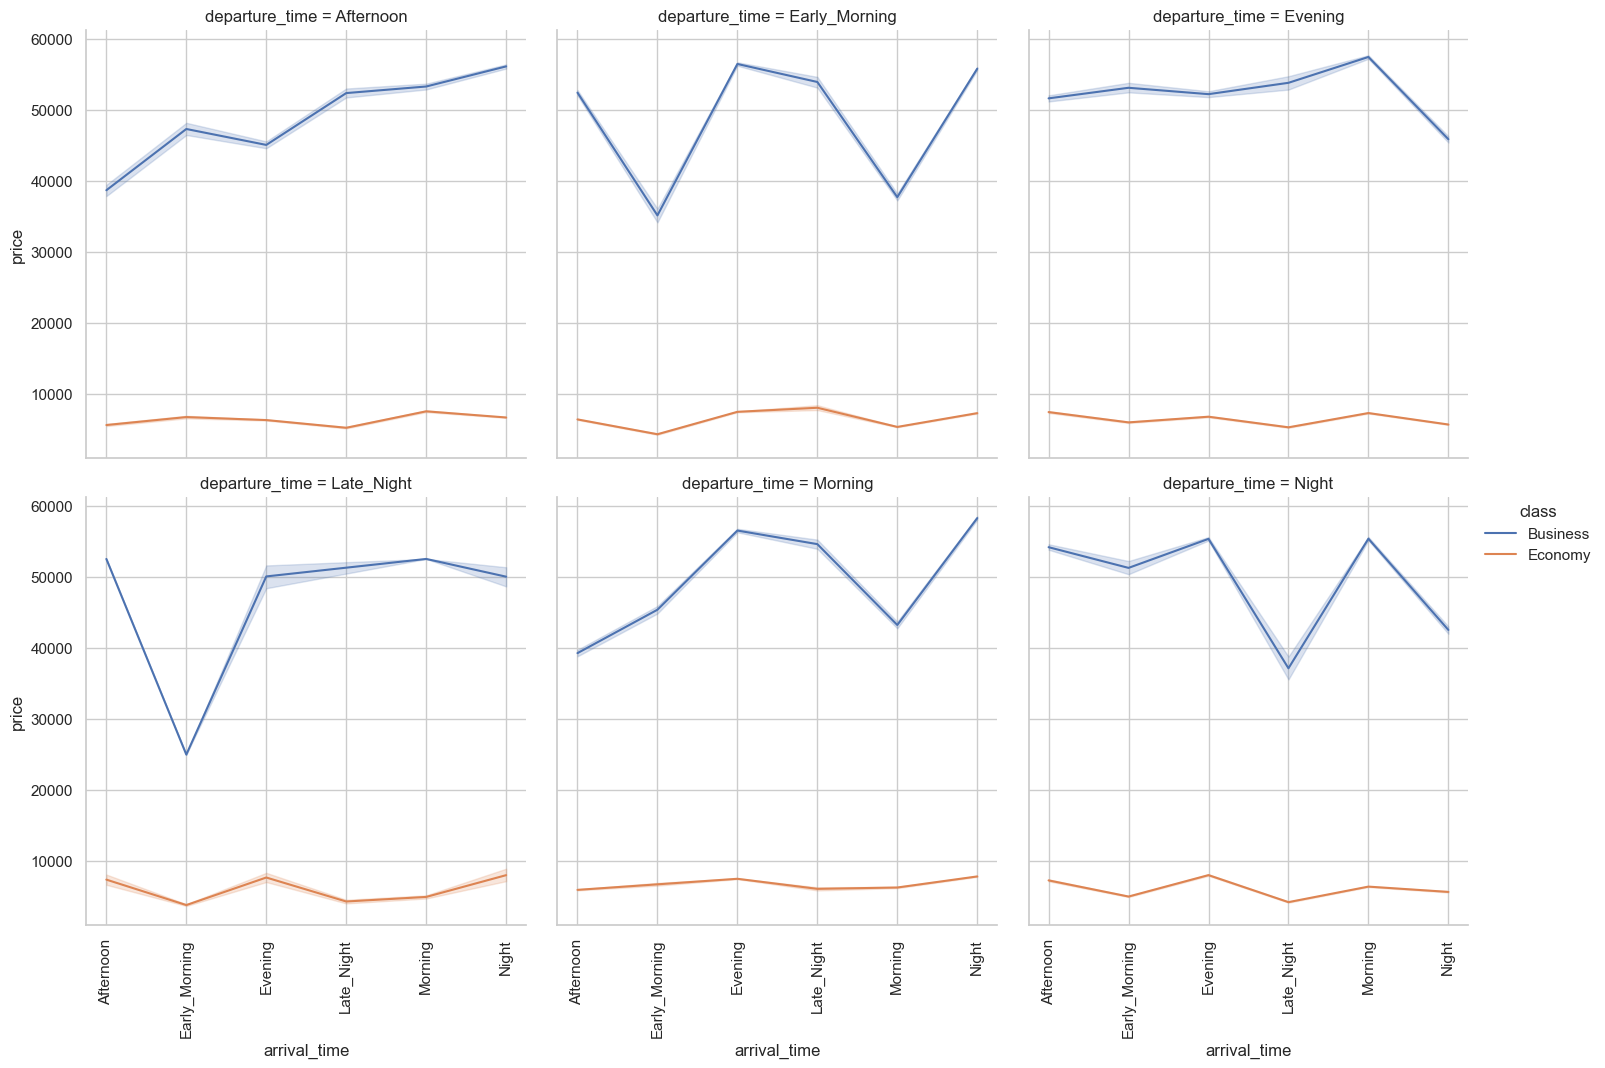

In [456]:
ax = sns.relplot(data=df, x='arrival_time', y='price', col='departure_time', col_wrap=3, hue='class', kind='line')
ax.set_xticklabels(rotation=90,labels=df['arrival_time'].cat.categories)
plt.show()


**Observations:**
- The line plots show that ticket prices vary significantly depending on both departure and arrival times.
- For Economy class, prices are lowest for Late_Night and Early_Morning departures/arrivals, and highest for Evening and Morning slots.
- For Business class, prices peak during Evening and Morning, and are relatively lower for Early_Morning and Late_Night.
- The trend is similar for both departure and arrival times, indicating that time of travel is a key factor in fare pricing.
- These patterns suggest airlines adjust pricing based on demand and travel preferences for different times of day.


#### Q: How the price changes with change in Source and Destination?

Average Economy ticket price by route:


destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,7105.95,6124.90,6360.14,7375.64,6381.09
Chennai,7175.02,NaN,6075.96,5960.79,7547.30,6529.12
Delhi,6175.62,6102.32,NaN,6031.16,7045.62,6059.83
Hyderabad,6234.88,6049.88,6072.30,NaN,6881.68,5969.26
Kolkata,7471.62,8011.75,7161.40,7489.14,NaN,7405.79
Mumbai,6432.51,6420.92,5889.28,5774.89,7227.97,NaN


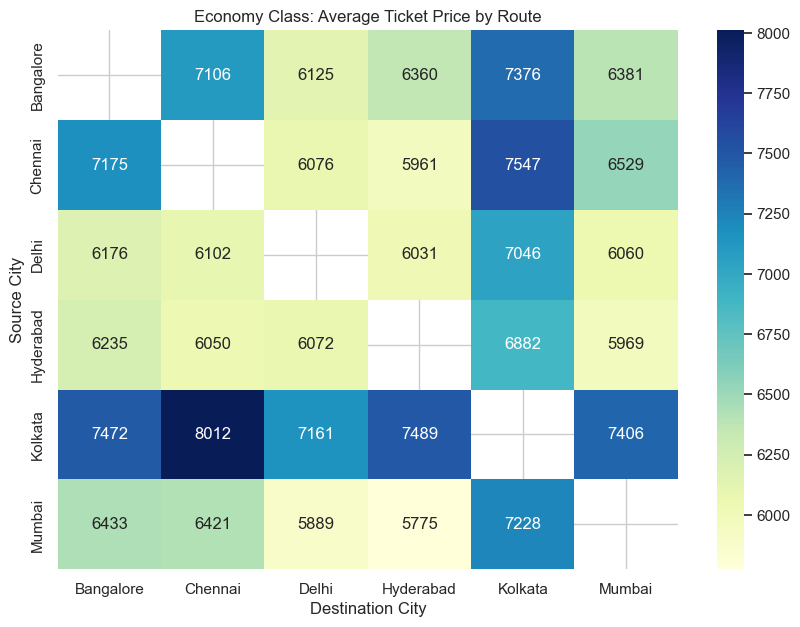

In [457]:
# Average ticket price by Source and Destination city, filtered for Economy class
pivot_economy_route = (
    df[df['class'] == 'Economy']
    .groupby(['source_city', 'destination_city'], observed=True)['price']
    .mean()
    .unstack()
)

print("Average Economy ticket price by route:")
display(pivot_economy_route)

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_economy_route, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Economy Class: Average Ticket Price by Route")
plt.ylabel("Source City")
plt.xlabel("Destination City")
plt.show()

Average Business ticket price by route:


destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,52436.92,48144.34,50395.80,58854.69,58024.62
Chennai,53113.01,NaN,52443.37,51559.87,57078.90,56223.84
Delhi,48576.03,52031.78,NaN,44457.38,56239.85,44364.44
Hyderabad,50358.29,51132.16,44250.70,NaN,53729.16,52184.42
Kolkata,58681.10,56502.78,55047.49,54732.45,NaN,57422.55
Mumbai,57970.54,55703.33,43846.33,51593.64,57106.53,NaN


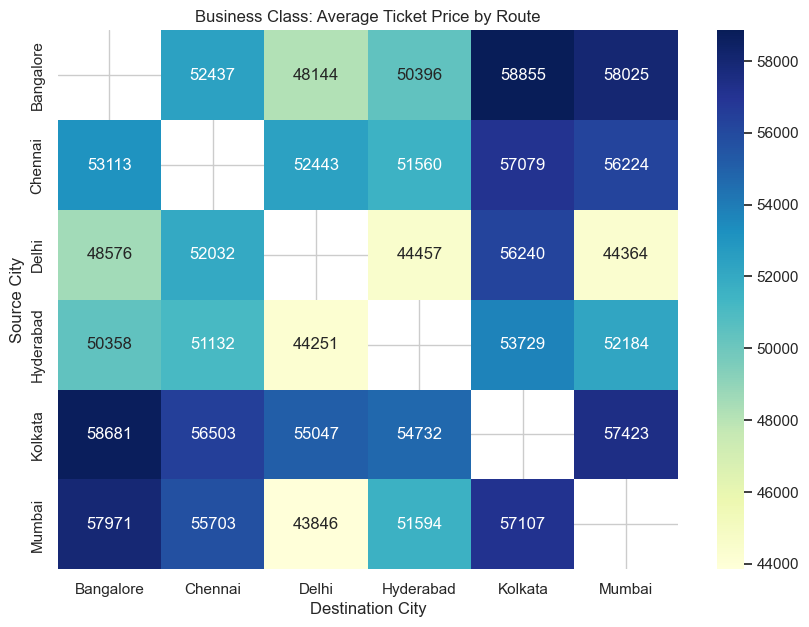

In [458]:
# Average ticket price by Source and Destination city, filtered for Economy Business
pivot_economy_route = (
    df[df['class'] == 'Business']
    .groupby(['source_city', 'destination_city'], observed=True)['price']
    .mean()
    .unstack()
)

print("Average Business ticket price by route:")
display(pivot_economy_route)

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_economy_route, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Business Class: Average Ticket Price by Route")
plt.ylabel("Source City")
plt.xlabel("Destination City")
plt.show()

***Route-wise Price & Heatmap Insights***
- **Economy:** Kolkata–Chennai and Kolkata–Hyderabad are the priciest; Mumbai–Hyderabad and Mumbai–Delhi are the cheapest.  
- **Business:** Kolkata–Bangalore, Kolkata–Chennai, Mumbai–Bangalore, and Mumbai–Kolkata show the highest fares — **6–8× Economy**.  
- **Symmetry:** Fares are consistent in both directions for most routes.  
- **Kolkata routes:** Consistently premium, likely due to distance or demand.  
- **Mumbai & Delhi:** Largely budget-friendly hubs.

**Conclusion:**  
Route choice heavily influences pricing — **Kolkata routes = premium**, **Mumbai/Delhi = economical**, supported by both Economy and Business heatmaps.

#### Q: How is price affected in wellplanned(30+ days) or unplanned(1 or 2 days) flight booking?


Average ticket price by booking type and class:


booking_type,Planned,Unplanned,Well-planned,percentage_diff
class,,,,
Business,52885,61205,51648,18.50
Economy,7475,14226,4919,189.21


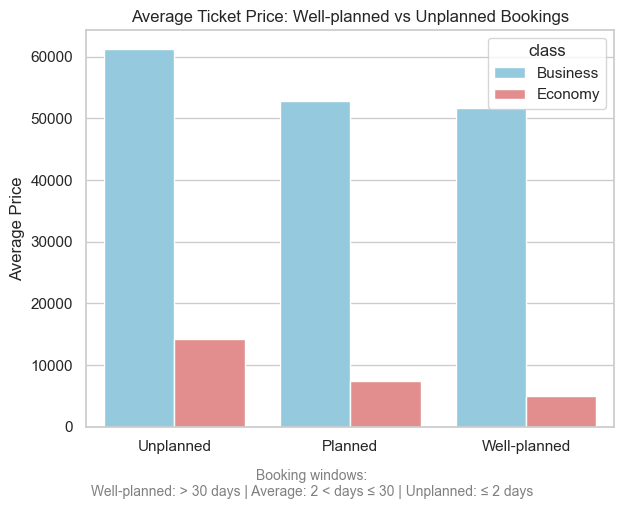

In [459]:
filtered = df[df['booking_type'].notna()]

# Make the barplot, letting Seaborn handle grouping via 'hue'
sns.barplot(
    data=filtered,
    x='booking_type',
    y='price',
    hue='class',
    estimator=np.mean,                  # calculates mean by default
    errorbar=None,                      # disables error bars for cleaner look
    palette=['skyblue', 'lightcoral']   # custom colors for better distinction
)

booking_type_price_df = df.groupby(['booking_type', 'class'], observed=True)['price'].mean().astype(int).unstack(level=0)
booking_type_price_df['percentage_diff'] = ((booking_type_price_df['Unplanned'] - booking_type_price_df['Well-planned']) / booking_type_price_df['Well-planned'] * 100).round(2)
print("\nAverage ticket price by booking type and class:")  
display(booking_type_price_df)

plt.title('Average Ticket Price: Well-planned vs Unplanned Bookings')
plt.ylabel('Average Price')
plt.xlabel('')

# Custom explanation below legend
plt.figtext(0.5, -0.05,
    "Booking windows:\nWell-planned: > 30 days | Average: 2 < days ≤ 30 | Unplanned: ≤ 2 days",
    ha='center', fontsize=10, color='gray', bbox=dict(alpha=0, boxstyle='round,pad=1', facecolor='whitesmoke')
)

plt.tight_layout()
plt.show()

**Summary:**  
The barplot shows that well-planned bookings (made more than 30 days in advance) result in significantly lower average ticket prices for both Economy and Business classes compared to unplanned bookings (1–2 days before departure). Economy fares drop from ₹14,226 (unplanned) to ₹4,919 (well-planned), while Business fares decrease from ₹61,206 to ₹51,649. Planning ahead offers substantial savings, especially for Economy travelers.

## 9. ✅ Conclusion & Next Steps

Dataset offers rich coverage of India’s domestic flight market — ideal for pricing and trend analysis.

**Top trends:**
  - Short–medium flights dominate; price and duration are right-skewed.
  - Early bookings yield ~60% savings.
  - Vistara and Air India lead in bookings; both offer Business class.
  - Kolkata routes remain premium; Mumbai/Delhi hubs are economical.

**Business Implications:**
- Airlines with high business class ratio can target frequent flyers with dynamic pricing
- Route- and city-specific pricing strategies (e.g., premium fares for Kolkata) can enhance revenue and competitive positioning.
- Mumbai-Delhi is a super route for new service options or premium upgrades
- Advance purchase promotions are effective, especially for price-sensitive Economy travelers.
- Outlier fare analysis spots opportunities for promotions/algo fixes

**Next steps:**
  - Model flight price prediction using regression.
  - Cluster routes by price/duration patterns.
  - Analyze seasonal trends with additional data.
